# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [126]:
# conda install -c conda-forge ta-lib

In [127]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [128]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [129]:
start_date = dt.datetime(2018, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'TSLA'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2018-03-01,23.00,23.24,22.00,22.06,22.06,103284000
2018-03-02,21.80,22.35,21.53,22.34,22.34,76392000
2018-03-05,22.16,22.52,21.95,22.22,22.22,57357000
2018-03-06,22.25,22.42,21.80,21.88,21.88,64285500
2018-03-07,21.70,22.17,21.45,22.15,22.15,75109500
...,...,...,...,...,...,...
2023-02-22,197.93,201.99,191.78,200.86,200.86,191828500
2023-02-23,203.91,205.14,196.33,202.07,202.07,146360000
2023-02-24,196.33,197.67,192.80,196.88,196.88,142228100
2023-02-27,202.03,209.42,201.26,207.63,207.63,161028300


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2018-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8+ KB


In [131]:
data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Open,1258.00000,136.40254,116.67672,12.07333,21.08817,118.76667,235.61167,411.47000
High,1258.00000,139.60061,119.32200,12.44533,21.50917,122.95667,239.94084,414.49667
Low,1258.00000,132.90162,113.66866,11.79933,20.65617,114.37833,231.32750,405.66666
Close,1258.00000,136.32559,116.50393,11.93133,21.14800,120.79500,236.14417,409.97000
Adj Close,1258.00000,136.32559,116.50393,11.93133,21.14800,120.79500,236.14417,409.97000
Volume,1258.00000,135734148.09221,90446931.98656,29401800.00000,76912200.00000,104907650.00000,166582500.00000,914082000.00000


#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [132]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,30MA,50MA,200MA,EMA_0.3
2023-02-22,197.93,201.99,191.78,200.86,200.86,191828500,170.08,155.61,222.65,202.16
2023-02-23,203.91,205.14,196.33,202.07,202.07,146360000,172.86,156.07,222.22,202.13
2023-02-24,196.33,197.67,192.80,196.88,196.88,142228100,175.31,156.65,221.89,200.56
2023-02-27,202.03,209.42,201.26,207.63,207.63,161028300,178.11,157.58,221.60,202.68
2023-02-28,210.59,211.23,203.75,205.71,205.71,153144900,180.89,158.56,221.40,203.59


In [133]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

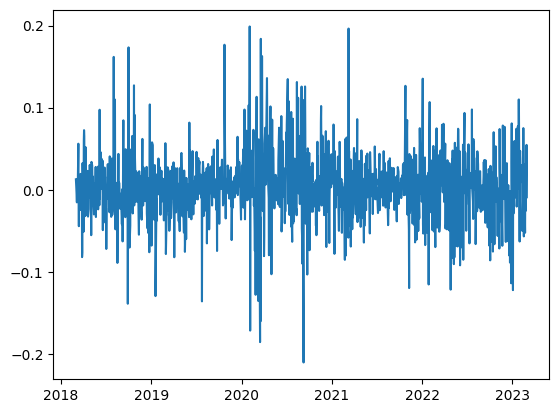

In [134]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

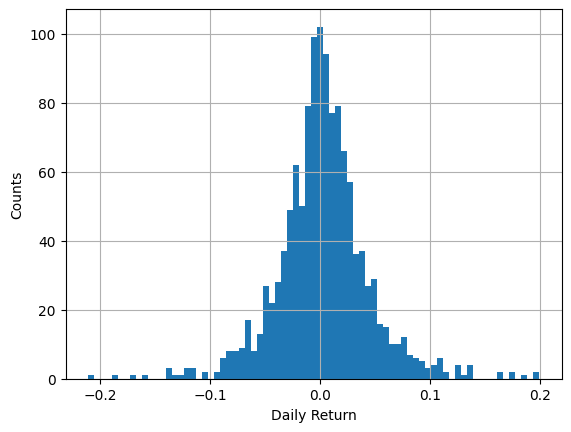

In [135]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [136]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

,Close
2018-03-31,21.07
2018-04-30,19.32
2018-05-31,19.32
2018-06-30,22.37
2018-07-31,20.80
2018-08-31,22.08
2018-09-30,19.34
2018-10-31,19.00
2018-11-30,22.97
2018-12-31,22.94


In [137]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

,Close,Year,Month,dayofweek,quarter
2018-03-31,21.07,2018,March,Saturday,1
2018-04-30,19.32,2018,April,Monday,2
2018-05-31,19.32,2018,May,Thursday,2
2018-06-30,22.37,2018,June,Saturday,2
2018-07-31,20.80,2018,July,Tuesday,3
2018-08-31,22.08,2018,August,Friday,3
2018-09-30,19.34,2018,September,Sunday,3
2018-10-31,19.00,2018,October,Wednesday,4
2018-11-30,22.97,2018,November,Friday,4
2018-12-31,22.94,2018,December,Monday,4


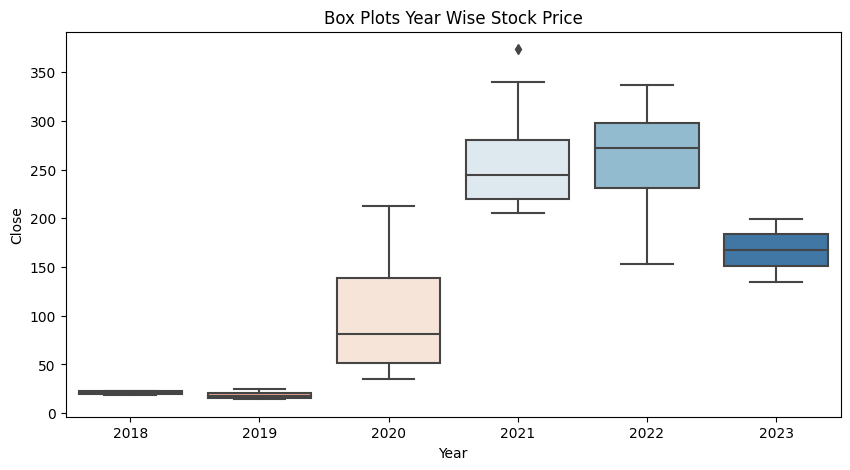

In [138]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

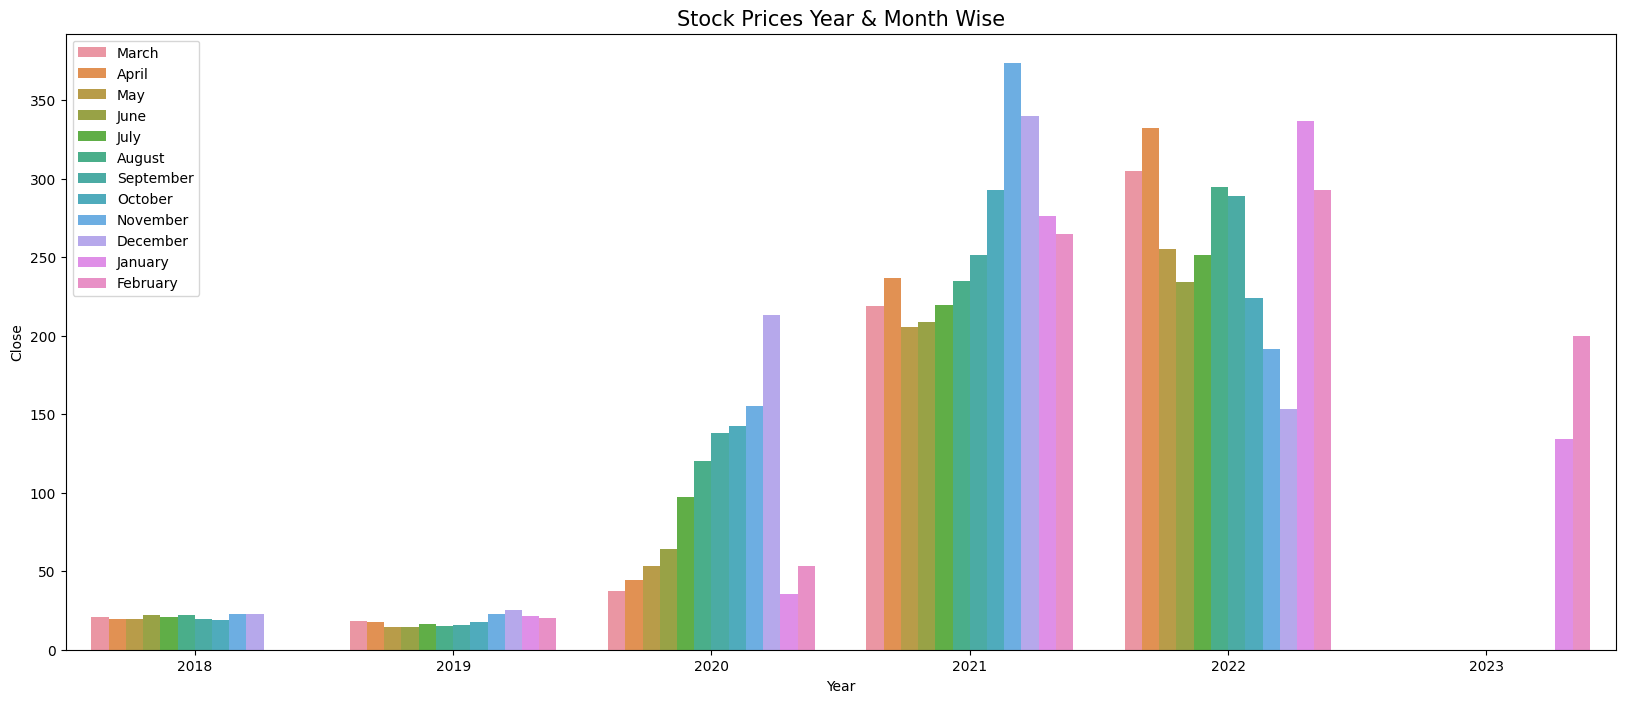

In [139]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

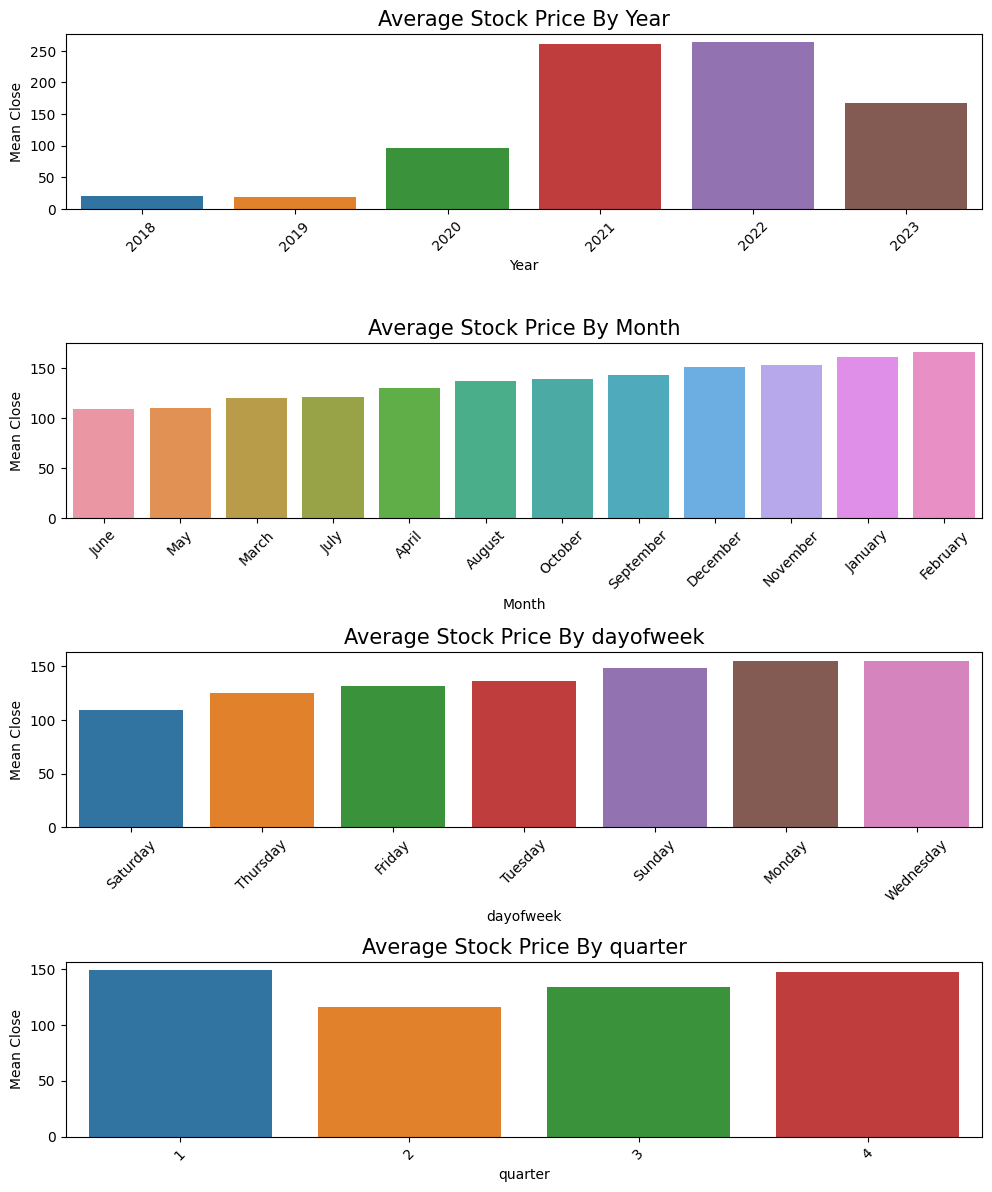

In [140]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [141]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

,Close,Volume,30MA,50MA,EMA_0.3
2018-03-01,22.06,103284000,NaN,NaN,22.06
2018-03-02,22.34,76392000,NaN,NaN,22.15
2018-03-05,22.22,57357000,NaN,NaN,22.17
2018-03-06,21.88,64285500,NaN,NaN,22.08
2018-03-07,22.15,75109500,NaN,NaN,22.10
...,...,...,...,...,...
2023-02-22,200.86,191828500,170.08,155.61,202.16
2023-02-23,202.07,146360000,172.86,156.07,202.13
2023-02-24,196.88,142228100,175.31,156.65,200.56
2023-02-27,207.63,161028300,178.11,157.58,202.68


### Retrieve from FRED Database (US Economics and market data)

In [142]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,2677.67,8135.78,2.81
2018-03-02,2691.25,8117.68,2.86
2018-03-05,2720.94,8206.39,2.88
2018-03-06,2728.12,8213.39,2.88
2018-03-07,2726.80,8183.38,2.89
...,...,...,...
2023-02-23,4012.32,11180.26,3.88
2023-02-24,3970.04,11095.39,3.95
2023-02-27,3982.24,11141.21,3.92
2023-02-28,3970.15,11048.13,3.92


In [143]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,22.06,103284000.00,NaN,NaN,22.06,2677.67,8135.78,2.81
2018-03-02,22.34,76392000.00,NaN,NaN,22.15,2691.25,8117.68,2.86
2018-03-05,22.22,57357000.00,NaN,NaN,22.17,2720.94,8206.39,2.88
2018-03-06,21.88,64285500.00,NaN,NaN,22.08,2728.12,8213.39,2.88
2018-03-07,22.15,75109500.00,NaN,NaN,22.10,2726.80,8183.38,2.89
...,...,...,...,...,...,...,...,...
2023-02-23,202.07,146360000.00,172.86,156.07,202.13,4012.32,11180.26,3.88
2023-02-24,196.88,142228100.00,175.31,156.65,200.56,3970.04,11095.39,3.95
2023-02-27,207.63,161028300.00,178.11,157.58,202.68,3982.24,11141.21,3.92
2023-02-28,205.71,153144900.00,180.89,158.56,203.59,3970.15,11048.13,3.92


## TA-Lib Technical Indicators

In [144]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-03-01,22.06,103284000.00,NaN,NaN,22.06,2677.67,8135.78,2.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103284000.00
2018-03-02,22.34,76392000.00,NaN,NaN,22.15,2691.25,8117.68,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179676000.00
2018-03-05,22.22,57357000.00,NaN,NaN,22.17,2720.94,8206.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122319000.00
2018-03-06,21.88,64285500.00,NaN,NaN,22.08,2728.12,8213.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58033500.00
2018-03-07,22.15,75109500.00,NaN,NaN,22.10,2726.80,8183.38,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133143000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,202.07,146360000.00,172.86,156.07,202.13,4012.32,11180.26,3.88,60.99,13.88,14.88,-1.00,221.65,193.18,164.71,34.33,42.24,35.23,139144523.89,12910421000.00
2023-02-24,196.88,142228100.00,175.31,156.65,200.56,3970.04,11095.39,3.95,57.43,12.74,14.45,-1.72,219.16,195.01,170.86,34.44,37.60,34.07,159693831.48,12768192900.00
2023-02-27,207.63,161028300.00,178.11,157.58,202.68,3982.24,11141.21,3.92,62.34,12.56,14.07,-1.52,219.90,196.50,173.09,52.21,40.32,33.79,182340456.17,12929221200.00
2023-02-28,205.71,153144900.00,180.89,158.56,203.59,3970.15,11048.13,3.92,60.99,12.12,13.68,-1.57,217.72,198.45,179.17,62.82,49.82,33.65,151837317.12,12776076300.00


In [145]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1259 non-null   float64
 1   Volume                 1259 non-null   float64
 2   30MA                   1230 non-null   float64
 3   50MA                   1210 non-null   float64
 4   EMA_0.3                1259 non-null   float64
 5   S&P500                 1259 non-null   float64
 6   DowJones               1259 non-null   float64
 7   10Y_Treasury_Rate      1259 non-null   float64
 8   RSI                    1244 non-null   float64
 9   MACD                   1225 non-null   float64
 10  MACD_Signal            1225 non-null   float64
 11  MACD_Histogram         1225 non-null   float64
 12  Upper_Bollinger_Band   1239 non-null   float64
 13  Middle_Bollinger_Band  1239 non-null   float64
 14  Lower_Bollinger_Band   1239 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [146]:
filtered_data = combined_data[49:-1]
filtered_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-05-10,20.33,84774000.00,19.44,20.16,20.12,2723.07,8253.22,2.97,54.53,-0.00,-0.21,0.21,20.64,19.60,18.56,85.22,83.46,14.30,89032594.81,-359508000.00
2018-05-11,20.07,70194000.00,19.52,20.12,20.10,2727.72,8297.16,2.97,52.09,0.01,-0.17,0.18,20.65,19.60,18.56,68.82,80.96,13.60,56677699.23,-429702000.00
2018-05-14,19.46,109302000.00,19.60,20.06,19.91,2730.13,8294.47,3.00,46.90,-0.02,-0.14,0.12,20.65,19.61,18.56,36.96,63.67,12.98,5338791.43,-539004000.00
2018-05-15,18.95,142788000.00,19.64,19.99,19.62,2711.45,8236.00,3.08,42.95,-0.09,-0.13,0.04,20.66,19.59,18.53,15.34,40.37,13.26,-9819268.21,-681792000.00
2018-05-16,19.10,85110000.00,19.64,19.94,19.47,2722.46,8256.76,3.09,44.44,-0.13,-0.13,-0.00,20.66,19.57,18.48,10.46,20.92,13.34,-5453277.71,-596682000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,200.86,191828500.00,170.08,155.61,202.16,3991.05,11134.50,3.93,60.46,14.61,15.13,-0.52,225.47,190.30,155.13,44.04,54.73,36.05,132724365.47,12764061000.00
2023-02-23,202.07,146360000.00,172.86,156.07,202.13,4012.32,11180.26,3.88,60.99,13.88,14.88,-1.00,221.65,193.18,164.71,34.33,42.24,35.23,139144523.89,12910421000.00
2023-02-24,196.88,142228100.00,175.31,156.65,200.56,3970.04,11095.39,3.95,57.43,12.74,14.45,-1.72,219.16,195.01,170.86,34.44,37.60,34.07,159693831.48,12768192900.00
2023-02-27,207.63,161028300.00,178.11,157.58,202.68,3982.24,11141.21,3.92,62.34,12.56,14.07,-1.52,219.90,196.50,173.09,52.21,40.32,33.79,182340456.17,12929221200.00


In [147]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1209 entries, 2018-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1209 non-null   float64
 1   Volume                 1209 non-null   float64
 2   30MA                   1209 non-null   float64
 3   50MA                   1209 non-null   float64
 4   EMA_0.3                1209 non-null   float64
 5   S&P500                 1209 non-null   float64
 6   DowJones               1209 non-null   float64
 7   10Y_Treasury_Rate      1209 non-null   float64
 8   RSI                    1209 non-null   float64
 9   MACD                   1209 non-null   float64
 10  MACD_Signal            1209 non-null   float64
 11  MACD_Histogram         1209 non-null   float64
 12  Upper_Bollinger_Band   1209 non-null   float64
 13  Middle_Bollinger_Band  1209 non-null   float64
 14  Lower_Bollinger_Band   1209 non-null  

In [148]:
filtered_data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Close,1209.00000,141.03401,116.42173,11.93133,21.87533,135.34000,237.92000,409.97000
Volume,1209.00000,136180374.11084,91166344.72654,29401800.00000,76956300.00000,105124500.00000,167642500.00000,914082000.00000
30MA,1209.00000,138.92185,115.80977,13.83687,21.35124,133.73676,238.95700,367.63444
50MA,1209.00000,137.85386,115.51208,14.62095,20.98592,125.85329,244.17734,357.87053
EMA_0.3,1209.00000,140.67974,116.20364,12.47191,21.57092,135.78753,237.69086,395.20205
S&P500,1209.00000,3522.61630,656.15232,2237.40000,2900.51000,3419.45000,4115.77000,4796.56000
DowJones,1209.00000,9833.69748,1397.26438,6100.31000,8625.97000,9573.56000,11284.87000,12360.33000
10Y_Treasury_Rate,1209.00000,2.06360,0.94989,0.52000,1.37000,1.84000,2.87000,4.25000
RSI,1209.00000,53.49698,13.92991,16.56413,43.55079,52.27665,63.00782,94.19798
MACD,1209.00000,0.92054,8.44871,-25.27133,-0.79708,0.38761,4.09835,38.06793


<AxesSubplot:>

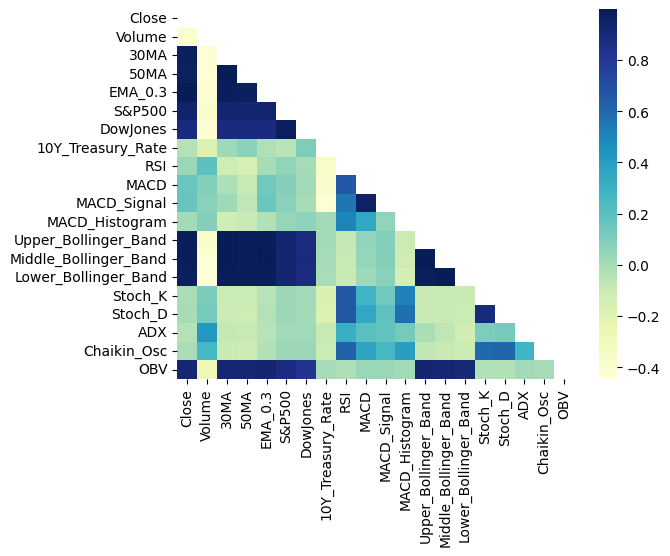

In [149]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(1209, 19)
(1209, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [151]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.46, 0.22, 0.09, 0.07, 0.04, 0.03, 0.03, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(846, 19)
(846, 1)
(363, 19)
(363, 1)


In [153]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

6.016619580856127

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [154]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:11<00:00,  1.69s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,0.99,0.99,5.96,0.05
RidgeCV,0.99,0.99,5.97,0.03
TransformedTargetRegressor,0.99,0.99,6.01,0.03
LinearRegression,0.99,0.99,6.01,0.02
LassoLarsIC,0.99,0.99,6.02,0.05
RANSACRegressor,0.99,0.99,6.06,0.06
LassoLarsCV,0.99,0.99,6.07,0.10
Ridge,0.99,0.99,6.30,0.03
HuberRegressor,0.99,0.99,6.40,0.13


# Regression & ensemble learning

In [155]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [156]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [157]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [158]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 4.055799 3.319826 2.394320 6.016620
LASSO: 34.893793 43.015684 3.722236 9.546901
RIDGE: 10.069958 8.055717 2.594441 6.420934
EN: 44.212959 47.532538 11.780772 35.230168
KNR: 43.394308 41.428927 4.824421 63.094930
CART: 32.986223 41.880081 0.000000 40.666503
SVR: 68.735747 65.554608 29.336200 132.297785
RFR: 31.188444 37.870795 1.104965 45.367663
BR: 31.221310 37.614935 1.419937 50.331130
ABR: 31.355402 36.745408 4.999308 44.824078
GBR: 30.357784 37.556723 1.030637 41.659354
ETR: 31.354842 37.616691 0.000000 46.195364
XGB: 30.381502 36.810696 0.058245 41.838508
LGBM: 32.031080 39.198485 0.744002 47.046002
CBR: 35.735175 45.303096 0.469355 59.633242
MLP: 61.604585 57.137300 13.008441 53.498092


In [159]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

,CV_mean,CV_std,Train_RMSE,Test_RMSE
Names,,,,
LR,4.06,3.32,2.39,6.02
LASSO,34.89,43.02,3.72,9.55
RIDGE,10.07,8.06,2.59,6.42
EN,44.21,47.53,11.78,35.23
KNR,43.39,41.43,4.82,63.09
CART,32.99,41.88,0.00,40.67
SVR,68.74,65.55,29.34,132.30
RFR,31.19,37.87,1.10,45.37
BR,31.22,37.61,1.42,50.33


#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

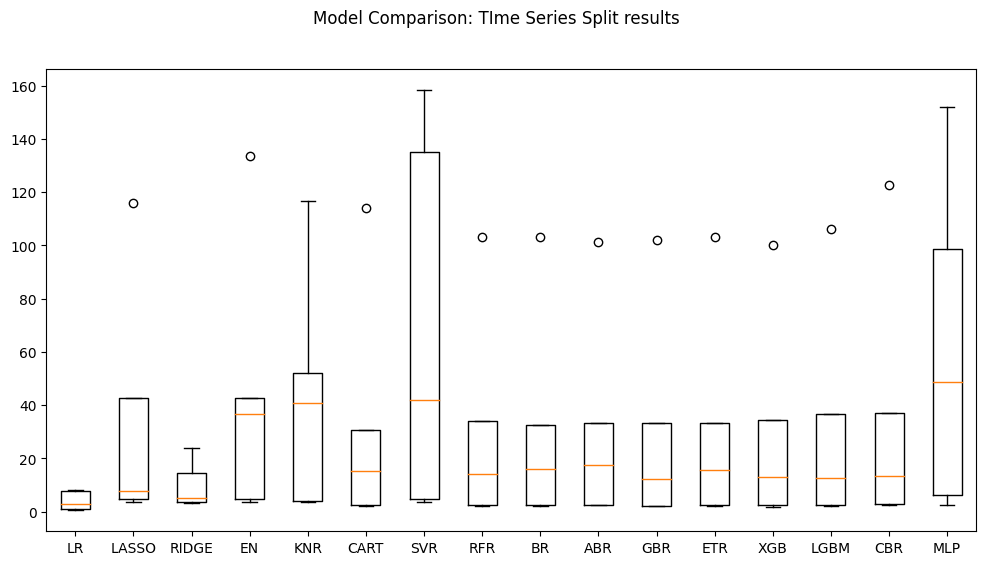

In [160]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [161]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

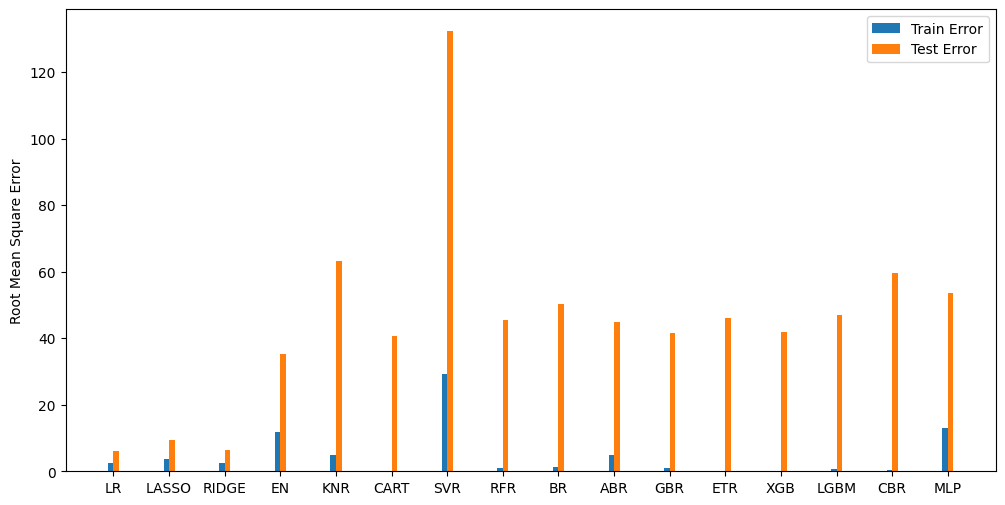

In [162]:
plot_models_RMSE()

# ARIMA

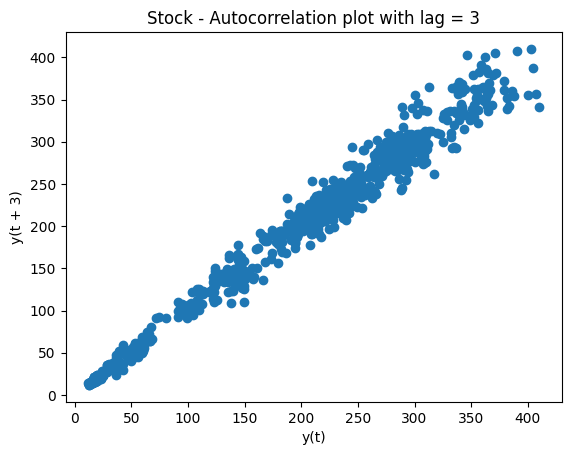

In [163]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [164]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [165]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-1.3459930383184986, 0.6078767847472882, 18, 1190, {'1%': -3.4358571109034814, '5%': -2.8639718371916243, '10%': -2.56806475672622}, 8062.517338070032) 

ADF Statistic: -1.3459930383184986
n_lags: 0.6078767847472882
p-value: 0.6078767847472882
Critial Values:
   1%, -3.4358571109034814
Critial Values:
   5%, -2.8639718371916243
Critial Values:
   10%, -2.56806475672622
	1%: -3.436
	5%: -2.864
	10%: -2.568

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

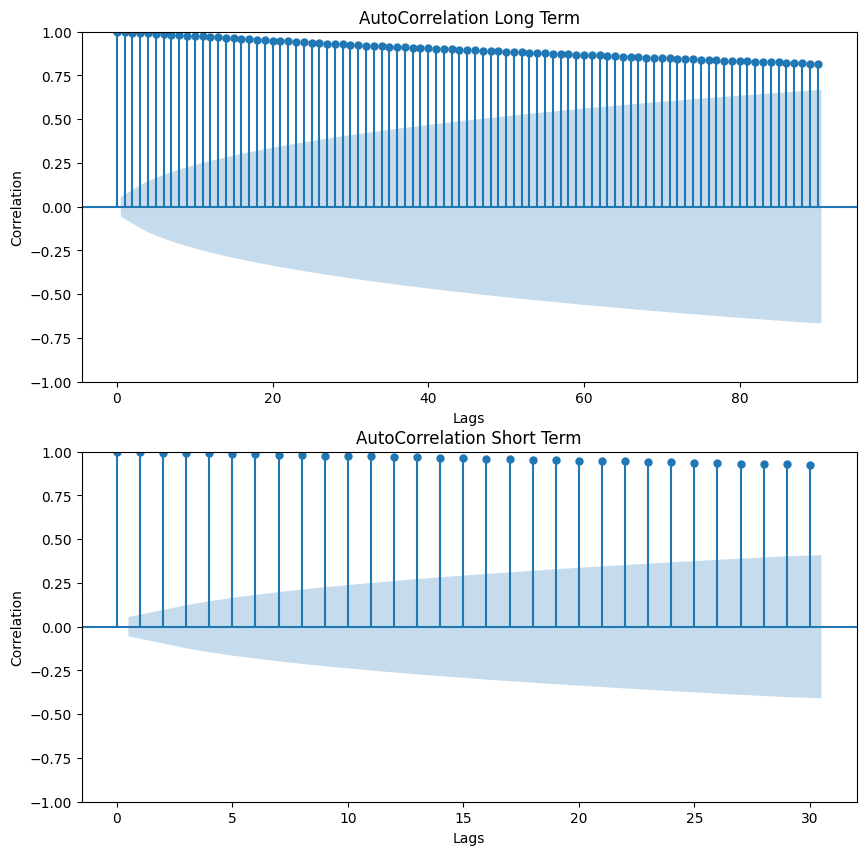

In [166]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

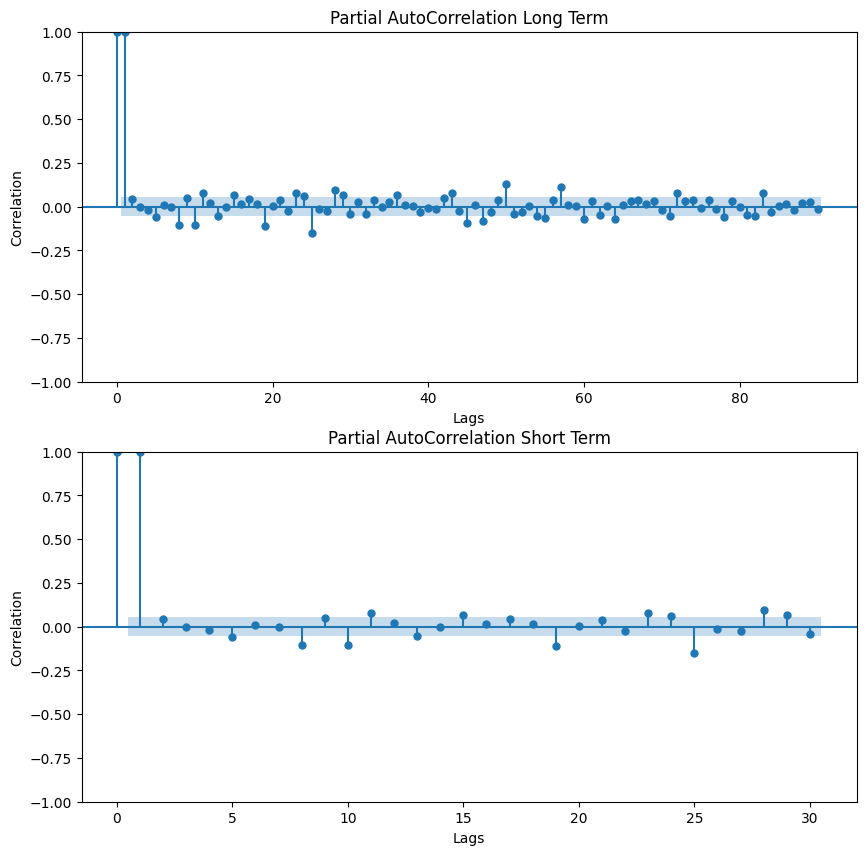

In [167]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

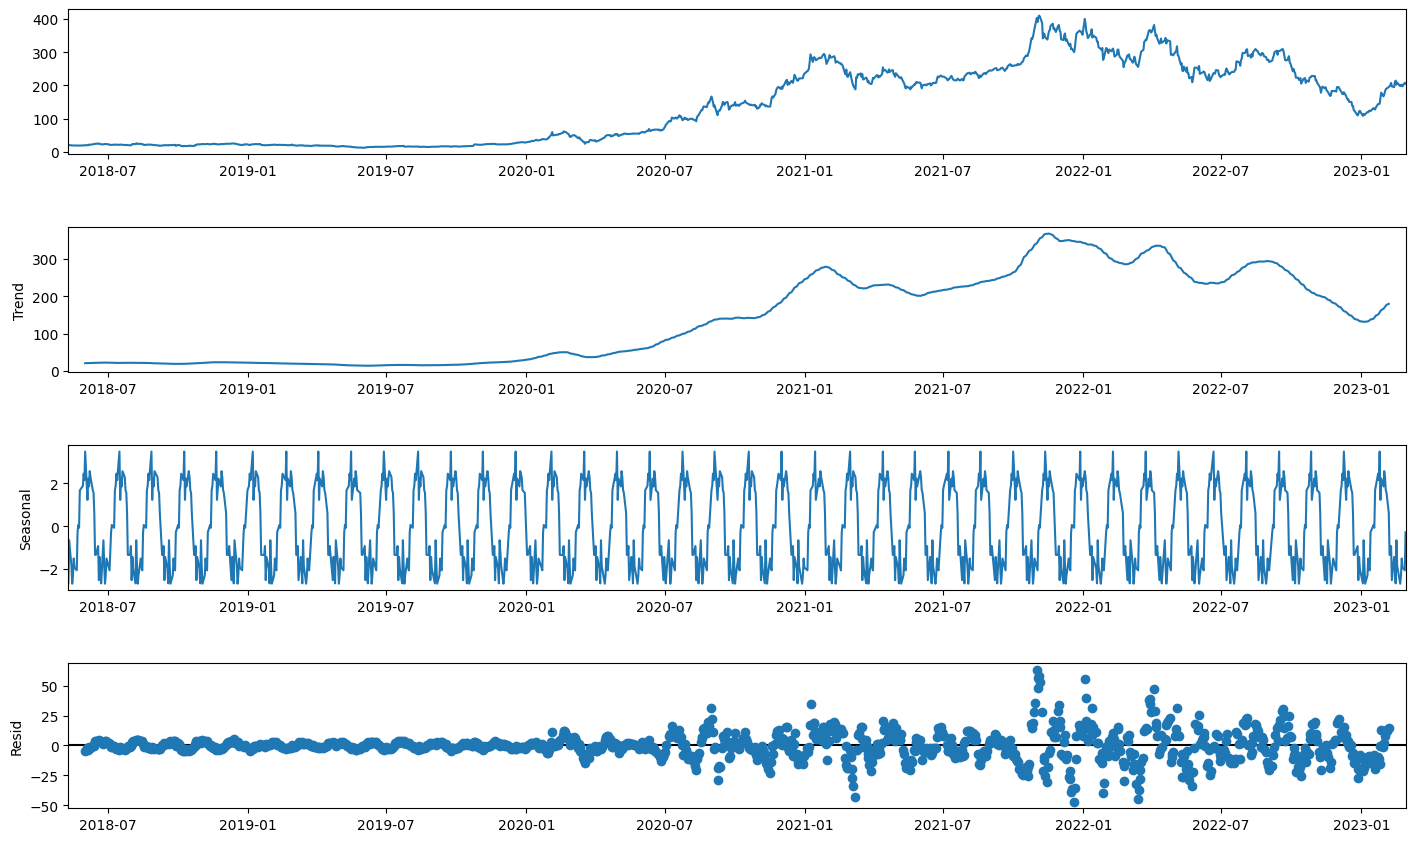

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [169]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [170]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 88.80354 | Test RMSE: 190.21572
Model (0, 0, 1) | Train RMSE: 46.42192 | Test RMSE: 221.50806
Model (0, 0, 2) | Train RMSE: 27.06640 | Test RMSE: 236.38927
Model (0, 1, 0) | Train RMSE: 4.68990 | Test RMSE: 255.21288
Model (0, 1, 1) | Train RMSE: 4.67860 | Test RMSE: 255.21156
Model (0, 1, 2) | Train RMSE: 4.67850 | Test RMSE: 255.21144
Model (0, 2, 0) | Train RMSE: 6.82660 | Test RMSE: 255.20686
Model (0, 2, 1) | Train RMSE: 4.69991 | Test RMSE: 255.19328
Model (0, 2, 2) | Train RMSE: 4.68724 | Test RMSE: 255.19250
Model (1, 0, 0) | Train RMSE: 5.21319 | Test RMSE: 254.96649
Model (1, 0, 1) | Train RMSE: 5.17701 | Test RMSE: 254.97137
Model (1, 0, 2) | Train RMSE: 5.17625 | Test RMSE: 254.97173
Model (1, 1, 0) | Train RMSE: 4.67893 | Test RMSE: 255.21169
Model (1, 1, 1) | Train RMSE: 4.67857 | Test RMSE: 255.21152
Model (1, 1, 2) | Train RMSE: 4.67728 | Test RMSE: 255.21127
Model (1, 2, 0) | Train RMSE: 5.82801 | Test RMSE: 255.20768
Model (1, 2, 1) | Tra

In [172]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 88.80354 | Test RMSE: 190.21572
Model (0, 0, 1) | Train RMSE: 46.42192 | Test RMSE: 190.05085
Model (0, 0, 2) | Train RMSE: 27.06640 | Test RMSE: 189.96583
Model (0, 1, 0) | Train RMSE: 4.68990 | Test RMSE: 69.52808
Model (0, 1, 1) | Train RMSE: 4.67860 | Test RMSE: 69.53889
Model (0, 1, 2) | Train RMSE: 4.67850 | Test RMSE: 69.54080
Model (0, 2, 0) | Train RMSE: 6.82660 | Test RMSE: 202.43277
Model (0, 2, 1) | Train RMSE: 4.69991 | Test RMSE: 113.94613
Model (0, 2, 2) | Train RMSE: 4.68724 | Test RMSE: 118.15934
Model (1, 0, 0) | Train RMSE: 5.21319 | Test RMSE: 68.82713
Model (1, 0, 1) | Train RMSE: 5.17701 | Test RMSE: 68.51440
Model (1, 0, 2) | Train RMSE: 5.17625 | Test RMSE: 68.48472
Model (1, 1, 0) | Train RMSE: 4.67893 | Test RMSE: 69.53742
Model (1, 1, 1) | Train RMSE: 4.67857 | Test RMSE: 69.53956
Model (1, 1, 2) | Train RMSE: 4.67728 | Test RMSE: 69.53930
Model (1, 2, 0) | Train RMSE: 5.82801 | Test RMSE: 172.35741
Model (1, 2, 1) | Train RMSE: 

In [173]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

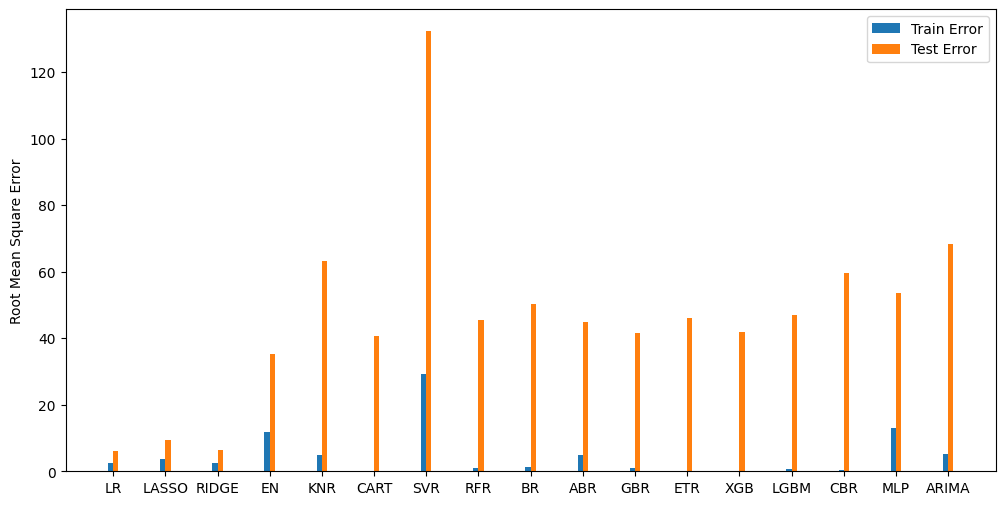

In [174]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [175]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  846
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2499.841
Date:                Tue, 28 Mar 2023   AIC                           5009.681
Time:                        18:00:06   BIC                           5033.384
Sample:                             0   HQIC                          5018.763
                                - 846                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8132    277.597      0.316      0.752    -456.266     631.893
ar.L1          0.9993      0.002    481.858      0.000       0.995       1.003
ma.L1         -0.0688      0.018     -3.772      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4992.776, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4990.278, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4990.107, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4993.760, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4992.077, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4992.018, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4993.521, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4991.597, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.392 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  846
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2492.054
Date:                Tue, 28 Mar 2023   AIC                           4990.107
Time:                        18:00:0

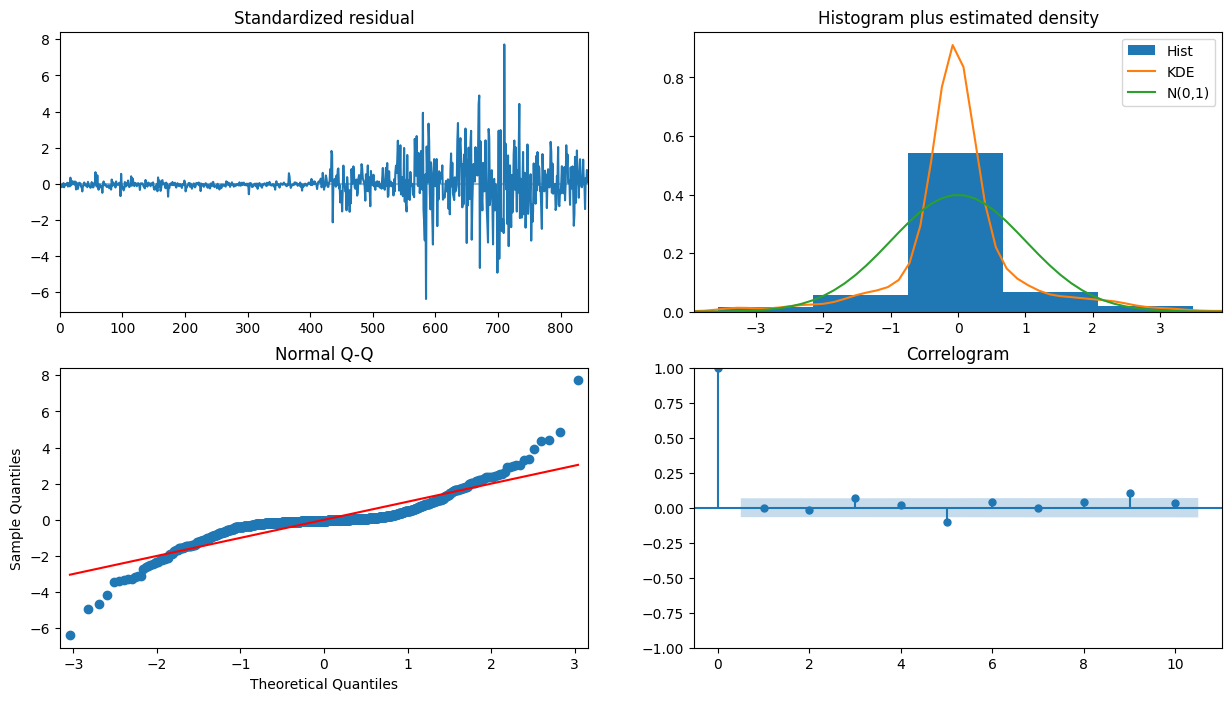

In [176]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [177]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [178]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(880, 1)
(378, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [179]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (869, 10)
trainY.shape =  (869,)
testX.shape =  (367, 10)
testY.shape =  (367,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [180]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([869, 10, 1])
trainY.shape =  torch.Size([869, 1])
testX.shape =  torch.Size([367, 10, 1])
testY.shape =  torch.Size([367, 1])


In [181]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [182]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [183]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [184]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.0976
Epoch: 20/100, Loss: 0.0794
Epoch: 30/100, Loss: 0.0546
Epoch: 40/100, Loss: 0.0470
Epoch: 50/100, Loss: 0.0780
Epoch: 60/100, Loss: 0.0369
Epoch: 70/100, Loss: 0.0371
Epoch: 80/100, Loss: 0.0338
Epoch: 90/100, Loss: 0.0310
Epoch: 100/100, Loss: 0.0300


In [185]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

       0
0 118.55
1 118.25
2 117.69
3 117.48
4 117.90
       0
0 116.22
1 118.16
2 118.60
3 118.24
4 118.83

LSTM Train RMSE: 9.0586405


#### Plotting the error loss of all epochs

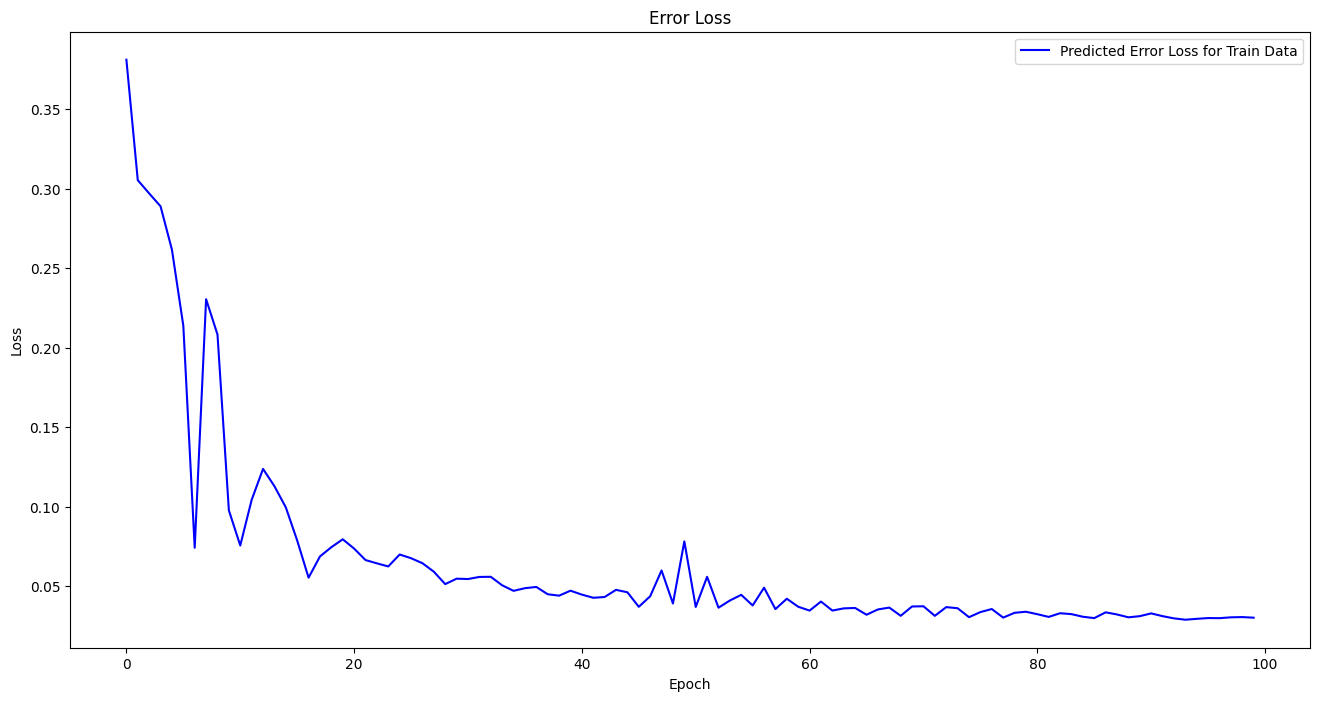

In [186]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

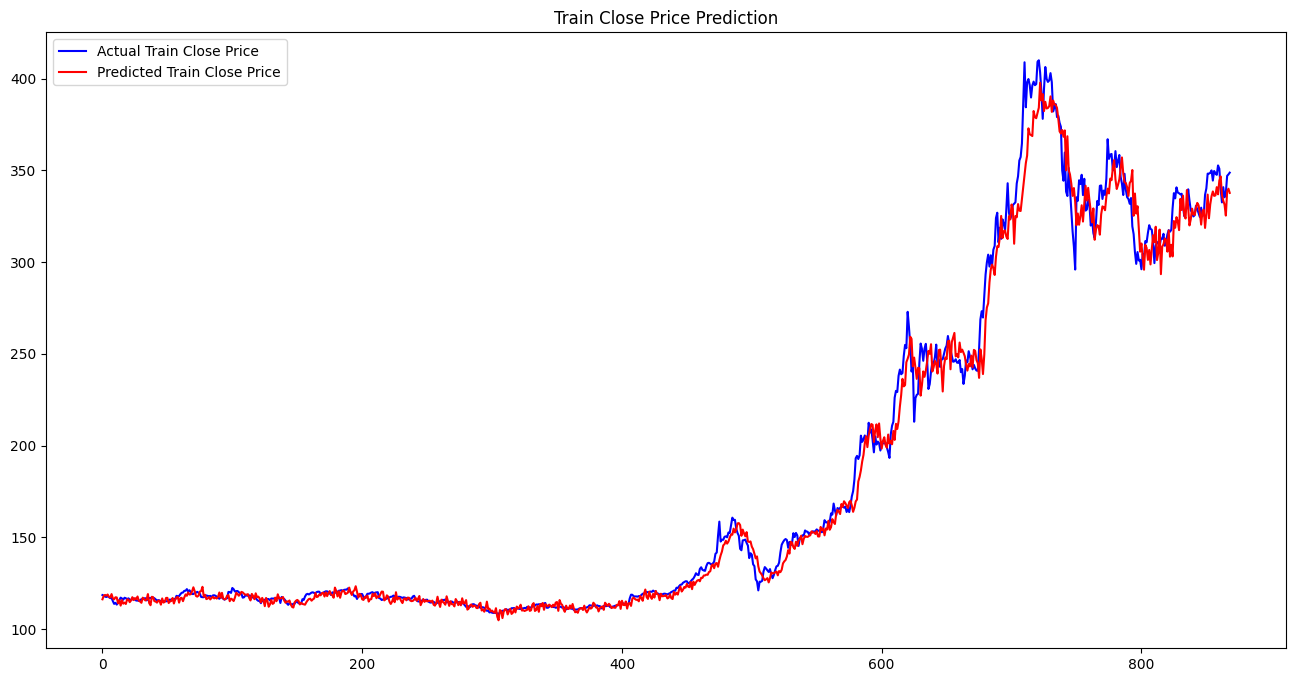

In [187]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [188]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

       0
0 247.67
1 248.16
2 251.94
3 252.33
4 253.16
       0
0 256.30
1 256.61
2 256.68
3 257.08
4 257.74

9.0586405


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [189]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

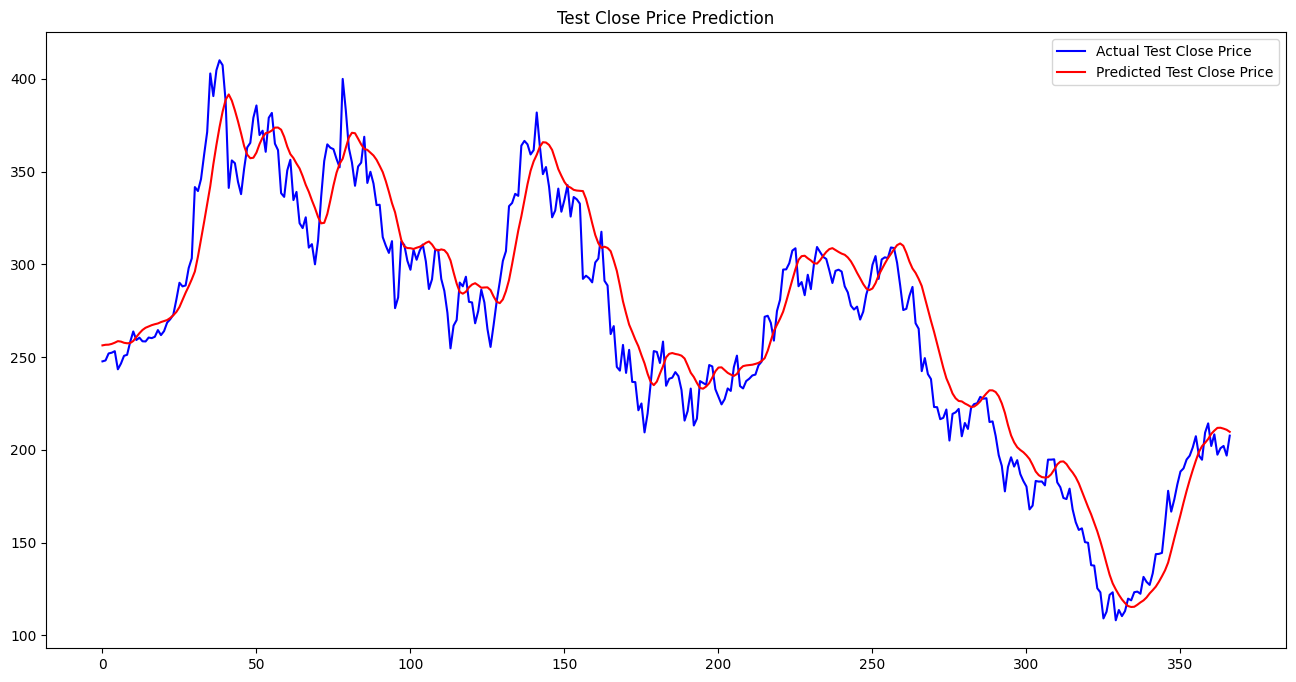

In [190]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [191]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

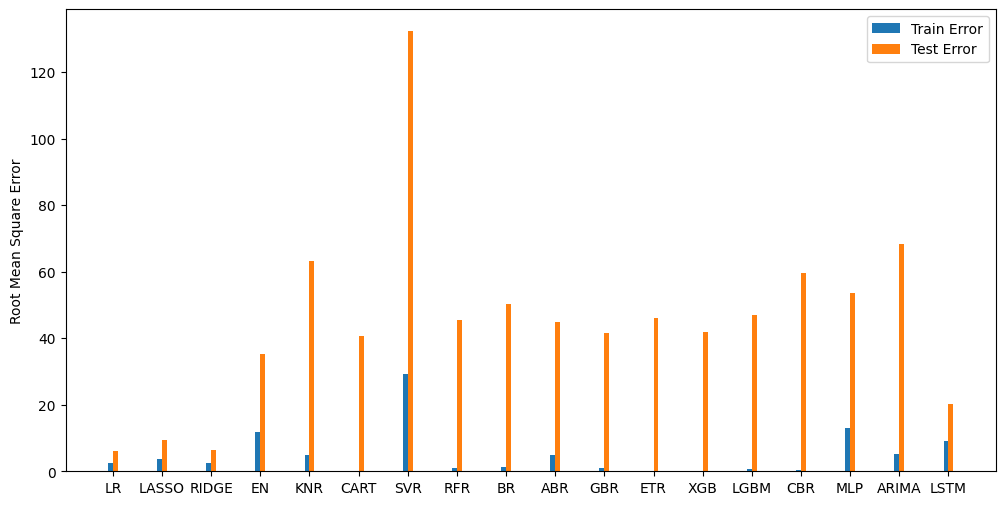

In [192]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.